In [1]:
# change into the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
    
%load_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [2]:
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
import mopet

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

!rm exploration.h5

def evalFunction(params):
    result_float = abs((params["x"] ** 2 + params["y"] ** 2) - 1)
    result_array = np.random.randn(np.random.randint(1, 131), np.random.randint(1, 5000))
    result = {}
    result["float_result"] = result_float
    result["array_result"] = result_array
    return result

explore_params = {"x": np.linspace(-2, 2, 21), "y": np.linspace(-2, 2, 21)}
    
ex = mopet.Exploration(evalFunction, explore_params)

In [3]:
ex.run()

2020-03-13 03:30:07,372	INFO resource_spec.py:212 -- Starting Ray with 3.42 GiB memory available for workers and up to 1.72 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-13 03:30:07,908	INFO services.py:1093 -- View the Ray dashboard at localhost:8267
INFO:root:Runs took 5.18723726272583 s to submit.
100%|██████████| 441/441 [00:02<00:00, 204.09it/s]
INFO:root:Runs and storage took 2.1734437942504883 s to complete.


In [4]:
ex.load_results()

INFO:root:exploration.h5 opened for reading.
INFO:root:Gettings runs of exploration ``exploration_2020_03_13_03H_30M_07S``
INFO:root:441 results loaded.
INFO:root:Creating new results DataFrame
INFO:root:exploration.h5 closed.


In [5]:
ex.results

{0: {'array_result': array([[-0.52620273,  0.75197942, -0.95264835, ...,  1.45445794,
          -1.01020374, -1.0588683 ],
         [-1.10644965, -0.50785575,  0.07505319, ...,  0.13734362,
          -1.14775437,  0.71447115],
         [ 0.76277203,  0.71123922, -0.71369705, ...,  0.60764054,
           0.67614162,  0.29304724],
         ...,
         [ 1.25982767,  2.14963507,  1.50090028, ...,  0.97748227,
          -0.21913148, -0.44615106],
         [-0.28830825,  0.72220705,  0.97901278, ...,  0.1307441 ,
          -0.01597827,  1.4959801 ],
         [-0.88330477, -0.14435918,  0.46207625, ...,  1.15971895,
          -1.46068009,  0.87968053]]), 'float_result': 7.0},
 1: {'array_result': array([[ 0.36697306,  0.78248569,  1.41756023, ..., -1.86753186,
          -1.15332906, -0.71723236],
         [ 0.73186995, -0.86580639,  1.15883658, ...,  0.38583418,
          -0.25009393, -0.32324387],
         [ 1.36321678, -0.97831241,  1.18780128, ..., -0.38965263,
           1.34514398,  0

In [6]:
ex.df["result"] = None
for r in ex.df.index:
    ex.df.loc[r, "result"] = ex.results[r]['float_result']

In [7]:
ex.df

,x,y,result
0,-2,-2,7
1,-2,-1.8,6.24
10,-2,0,3
100,-1.2,1.2,1.88
101,-1.2,1.4,2.4
...,...,...,...
95,-1.2,0.2,0.48
96,-1.2,0.4,0.6
97,-1.2,0.6,0.8
98,-1.2,0.8,1.08


In [8]:
pivoted = ex.df.pivot_table(values='result', index = 'y', columns='x', aggfunc='first')

Text(0, 0.5, 'y')

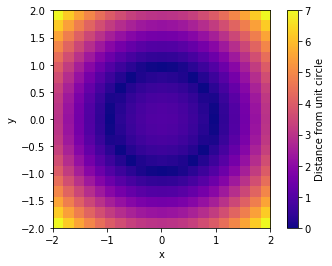

In [9]:
plt.imshow(pivoted, \
           extent = [min(ex.df.x), max(ex.df.x),
                     min(ex.df.y), max(ex.df.y)], origin='lower')
plt.colorbar(label='Distance from unit circle')
plt.xlabel("x")
plt.ylabel("y")